<a href="https://colab.research.google.com/github/Sreekodavanti/ML-and-DL/blob/main/penguin_classification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from imblearn.over_sampling import SMOTE


In [ ]:
#import dataset
df = pd.read_csv("/content/wine.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

In [ ]:
df.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

In [ ]:
df.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

In [ ]:
#scaling since the data model has less features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['FlipperLength', 'BodyMass']])
df.loc[:, ['FlipperLength', 'BodyMass']] = scaled_features


#since species is the dependent variable for our datset
features = df[['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']].values
labels = df['Species'].values

# Splitting the data into training and testing sets with 70% training and 30 testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)



In [ ]:
#since species is the dependent variable for our datset
features = df[['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']].values
labels = df['Species'].values

# Splitting the data into training and testing sets with 70% training and 30 testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)



In [ ]:
print ('Training Set: %d, Test Set: %d \n' % (len(X_train), len(X_test)))
print(f"Sample of features and labels: \n Features = {features},\n Label = {labels}")

Training Set: 240, Test Set: 104 

Sample of features and labels: 
 Features = [[39.1        18.7        -1.42248782 -0.56578921]
 [39.5        17.4        -1.06535169 -0.50316788]
 [40.3        18.         -0.42250666 -1.19200251]
 ...
 [49.6        18.2        -0.56536111 -0.53447855]
 [50.8        19.          0.64890172 -0.1274399 ]
 [50.2        18.7        -0.20822498 -0.53447855]],
 Label = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [ ]:
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [ ]:
# first 15 training features and labels
for i in range(15):
    print(f"Features: {X_train_oversampled[i]}, Label: {y_train_oversampled[i]}")


Features: [37.2        18.1        -1.63676949 -0.37792522], Label: 0
Features: [49.5        16.1         1.64888288  1.81382133], Label: 1
Features: [50.         19.5        -0.35107943 -0.37792522], Label: 2
Features: [48.4        14.6         0.8631834   2.06430665], Label: 1
Features: [48.4        14.4         0.14891115  0.53008407], Label: 1
Features: [38.8        17.6        -0.70821556 -1.16069185], Label: 0
Features: [46.1        18.2        -1.63676949 -1.19200251], Label: 2
Features: [37.6        19.1        -0.49393388 -0.56578921], Label: 0
Features: [45.6        20.3        -0.70821556  0.4987734 ], Label: 0
Features: [43.6        13.9         1.1488923   0.87450138], Label: 1
Features: [36.6        17.8        -1.13677891 -0.62841054], Label: 0
Features: [38.9        17.8        -1.42248782 -0.72234254], Label: 0
Features: [45.5        14.5         0.79175618  0.68663739], Label: 1
Features: [47.7        15.          1.07746508  0.68663739], Label: 1
Features: [39.6     

In [ ]:
# Converting the oversampled data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_oversampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_oversampled, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
# As mentioned in the challenge, we will create a dataloader for our training and testing datasets.
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
# Defining the neural network model
class PenguinClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(PenguinClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



In [ ]:
# Setting a random seed for reproducibility
torch.manual_seed(42)

# Number of hidden layer nodes
hl = 10

# Define the neural network
model = PenguinClassifier(input_size=4, hidden_size=hl, num_classes=3)

print(model)

PenguinClassifier(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=3, bias=True)
)


In [ ]:
# Specify the loss criteria (CrossEntropyLoss for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Use the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

no_grad() is a pyTorch context manager that disables gradient computation. We use this while we are making predictions or on a validation set. Since we dont update our parameters, using this we can reduce our memory comsumption and speed up computation.

ref: https://maiminh1996.github.io/distilled/pytorch/disable-gradient-computation.html

In [ ]:
# Train the model
n_epochs = 50

for epoch in range(n_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # Evaluate the model on the test set
    # This is the Validation phase where we switch back to evaluation mode ---
    #---so we dont backpropagate using model.eval()
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    total_loss = 0

    for test_X, test_y in test_loader:
        test_outputs = model(test_X)
        _, predicted = torch.max(test_outputs.data, 1)
        total += test_y.size(0)
        correct += (predicted == test_y).sum().item()
        test_loss = criterion(test_outputs, test_y)
        total_loss += test_loss.item()
    accuracy = correct / total
    avg_test_loss = total_loss / len(test_loader)

    # Printing the validation set results
    print('Validation set: Average loss: {:.6f}, Accuracy: {:.2f}%'.format(avg_test_loss, accuracy * 100))



Validation set: Average loss: 0.101236, Accuracy: 96.15%


In [ ]:
# Save the trained model
torch.save(model.state_dict(), 'penguin_model_classifier.pth')

# Load the saved model
loaded_model = PenguinClassifier(input_size=4, hidden_size=hl, num_classes=3)
loaded_model.load_state_dict(torch.load('penguin_model_classifier.pth'))
#eval() is used to set the model in evaluation mode
loaded_model.eval()


PenguinClassifier(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=3, bias=True)
)

In [ ]:
import matplotlib.pyplot as plt

# Loading the saved model
loaded_model = PenguinClassifier(input_size=4, hidden_size=hl, num_classes=3)
loaded_model.load_state_dict(torch.load('penguin_model_classifier.pth'))
loaded_model.eval()

# training for additional epochs
new_training_epochs = 50

for epoch in range(new_training_epochs):
    loaded_model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = loaded_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # now we Evaluate the loaded model on remaining test set
    loaded_model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for test_X, test_y in test_loader:
            test_outputs = loaded_model(test_X)
            _, predicted = torch.max(test_outputs.data, 1)
            total += test_y.size(0)
            correct += (predicted == test_y).sum().item()

    accuracy = correct / total

    # Print training statistics including learning rate
    print('Epoch [{}/{}], Loss: {:.6f}, Accuracy: {:.2f}%'.format(
        epoch + 1, new_training_epochs, loss.item(), accuracy * 100))

Epoch [1/50], Loss: 0.030086, Accuracy: 97.12%
Epoch [2/50], Loss: 0.016038, Accuracy: 97.12%
Epoch [3/50], Loss: 0.078557, Accuracy: 97.12%
Epoch [4/50], Loss: 0.002531, Accuracy: 97.12%
Epoch [5/50], Loss: 0.011801, Accuracy: 97.12%
Epoch [6/50], Loss: 0.009282, Accuracy: 97.12%
Epoch [7/50], Loss: 0.007029, Accuracy: 97.12%
Epoch [8/50], Loss: 0.029385, Accuracy: 97.12%
Epoch [9/50], Loss: 0.065699, Accuracy: 97.12%
Epoch [10/50], Loss: 0.303529, Accuracy: 97.12%
Epoch [11/50], Loss: 0.100199, Accuracy: 97.12%
Epoch [12/50], Loss: 0.009218, Accuracy: 97.12%
Epoch [13/50], Loss: 0.087160, Accuracy: 97.12%
Epoch [14/50], Loss: 0.005032, Accuracy: 97.12%
Epoch [15/50], Loss: 0.019990, Accuracy: 97.12%
Epoch [16/50], Loss: 0.034216, Accuracy: 97.12%
Epoch [17/50], Loss: 0.125659, Accuracy: 97.12%
Epoch [18/50], Loss: 0.082131, Accuracy: 97.12%
Epoch [19/50], Loss: 0.036839, Accuracy: 97.12%
Epoch [20/50], Loss: 0.032889, Accuracy: 97.12%
Epoch [21/50], Loss: 0.006774, Accuracy: 97.12%
E

In [ ]:
# Lists to store training and validation losses for plotting
new_train_losses = []
new_validation_losses = []

# Additional Training Loop
for epoch in range(new_training_epochs):
    loaded_model.train()
    total_loss = 0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = loaded_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    new_train_losses.append(avg_train_loss)

    # Validation Loop
    loaded_model.eval()
    with torch.no_grad():
        validation_loss = 0

        for test_X, test_y in test_loader:
            test_outputs = loaded_model(test_X)
            loss = criterion(test_outputs, test_y)
            validation_loss += loss.item()

        # Calculate average validation loss for the epoch
        avg_validation_loss = validation_loss / len(test_loader)
        new_validation_losses.append(avg_validation_loss)

    # Print and log the losses
    print('Epoch [{}/{}], Training Loss: {:.6f}, Validation Loss: {:.6f}'.format(
        epoch + 1, new_training_epochs, avg_train_loss, avg_validation_loss))



Epoch [1/50], Training Loss: 0.089411, Validation Loss: 0.087960
Epoch [2/50], Training Loss: 0.086647, Validation Loss: 0.087960
Epoch [3/50], Training Loss: 0.085651, Validation Loss: 0.087960
Epoch [4/50], Training Loss: 0.085202, Validation Loss: 0.087960
Epoch [5/50], Training Loss: 0.085811, Validation Loss: 0.087960
Epoch [6/50], Training Loss: 0.088982, Validation Loss: 0.087960
Epoch [7/50], Training Loss: 0.090710, Validation Loss: 0.087960
Epoch [8/50], Training Loss: 0.084974, Validation Loss: 0.087960
Epoch [9/50], Training Loss: 0.086108, Validation Loss: 0.087960
Epoch [10/50], Training Loss: 0.086248, Validation Loss: 0.087960
Epoch [11/50], Training Loss: 0.084472, Validation Loss: 0.087960
Epoch [12/50], Training Loss: 0.092702, Validation Loss: 0.087960
Epoch [13/50], Training Loss: 0.084671, Validation Loss: 0.087960
Epoch [14/50], Training Loss: 0.085214, Validation Loss: 0.087960
Epoch [15/50], Training Loss: 0.085037, Validation Loss: 0.087960
Epoch [16/50], Trai

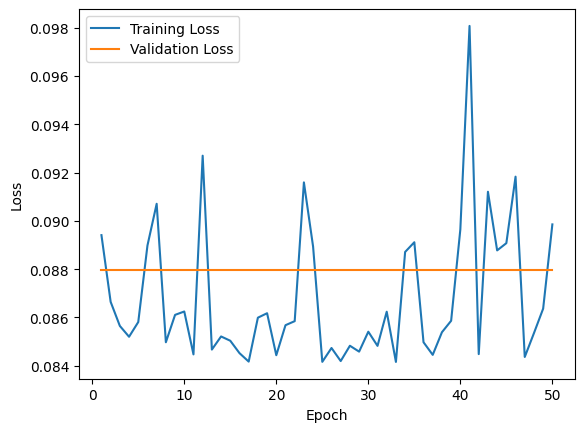

In [ ]:
# Plot the loss curves
plt.plot(range(1, new_training_epochs + 1), new_train_losses, label='Training Loss')
plt.plot(range(1, new_training_epochs + 1), new_validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# View the learned weights and biases
for param_tensor in loaded_model.state_dict():
    print(param_tensor, "\n", loaded_model.state_dict()[param_tensor].numpy())

# Evaluate model performance
loaded_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for test_X, test_y in test_loader:
        test_outputs = loaded_model(test_X)
        _, predicted = torch.max(test_outputs.data, 1)
        total += test_y.size(0)
        correct += (predicted == test_y).sum().item()

    accuracy = correct / total
    print('After Additional Training on new values, Accuracy on Test Set: {:.2f}%'.format(accuracy))

# Save the trained model
torch.save(loaded_model.state_dict(), 'additional_trained_model.pth')

# Use the trained model for inference
x_new = torch.tensor([[50.4, 15.3, 20, 50]], dtype=torch.float32)
predicted_class = torch.argmax(loaded_model(x_new)).item()

print('Predicted Class for New Data:', predicted_class)

fc1.weight 
 [[ 0.45665053  0.0537829  -0.05506463 -0.03876657]
 [-0.10955179  0.10089535 -0.24342752  0.29364133]
 [ 0.5666652  -0.9105936   1.20702     0.32855698]
 [ 0.28106305  0.41879132  0.22143883  0.4781253 ]
 [ 0.36478058  0.1747151   1.0047293   1.3775566 ]
 [-0.23036832 -0.05863643 -0.20307916  0.33168548]
 [-0.3946851  -0.23050517 -0.14118737 -0.30063623]
 [ 0.04719156 -0.49383956  0.45155454 -0.42473412]
 [ 0.22367153  0.61649966 -1.3109796  -0.6601415 ]
 [ 0.05317665  0.446461   -1.6185713  -1.6885858 ]]
fc1.bias 
 [-0.3699846  -0.13558972 -0.29726493  0.9574291   0.8245642  -0.21858627
  0.28863233  0.08946311  0.24758829 -0.83993286]
fc2.weight 
 [[-0.3208217  -0.12217793 -1.0634327   0.2948844   0.05861188  0.13098583
   0.10001057 -0.00550109  0.33113435  0.07662421]
 [ 0.07223777 -0.21583815  0.6833125  -0.08500908  0.23170666 -0.06588336
   0.26227674 -0.1874288  -0.30677715 -0.72546893]
 [ 0.26327524  0.10538325  0.43284205 -0.30353892 -0.37904033 -0.24740514
  -0.